# 此筆記介紹 many to many這個種類的 RNN。

所謂many to many即：

於多個(many)連續的時間點讀取資訊(例如：$\vec{x}_{t=0},\vec{x}_{t=1},\vec{x}_{t=2},...,\vec{x}_{t=n}$)，然後輸出於各相應時間點(many)的預測結果(例如：$\vec{out}_{t=0},\vec{out}_{t=1},\vec{out}_{t=2},...,\vec{out}_{t=n}$)。

---

In [1]:
# =========================================================================
# 由於課堂上可能有多人共用同一顆GPU，以下限定使用者只能用計算卡上45%的記憶體。
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.95 # 使用45%記憶體
set_session(tf.Session(config=config))
# =========================================================================

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np

import pandas as pd

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN,LSTM,Dense

## 拿$\cos(t_1)$, $\cos(t_2)$, ..., $\cos(t_n)$去預測$\sin(t_1)$, $\sin(t_2)$, ..., $\sin(t_n)$

### 1. 畫出$\sin(x)$和$\cos(x)$

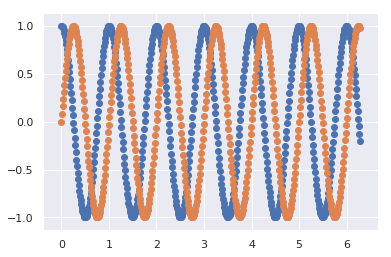

In [4]:
line=np.linspace(0,2.*np.pi,500)
in_x=np.cos(2.*np.pi*line)
in_y=np.sin(2.*np.pi*line)

plt.scatter(line,in_x)
plt.scatter(line,in_y)

### 2. 產生用於訓練和測試的資料。

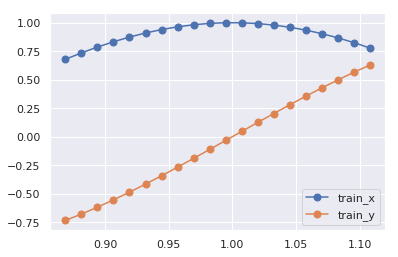

In [5]:
line=np.linspace(0,2.*np.pi,500)
in_x=np.cos(2.*np.pi*line)
in_y=np.sin(2.*np.pi*line)

n=20 # 每個樣本有20個用於訓練的x
m=n  # 每個樣本有20個用於訓練的y
num_samples=200 # 200個樣本

# 建立訓練用樣本 train_x, train_y
train_x=np.zeros((num_samples,n),dtype=np.float32 )
train_y=np.zeros((num_samples,m),dtype=np.float32 )
rand_nums=np.zeros(num_samples,dtype=np.int32)

for j in range(num_samples):
    rand_nums[j]=np.random.choice(500-n)
    train_x[j,:]=in_x[rand_nums[j]:rand_nums[j]+n]
    train_y[j,:]=in_y[rand_nums[j]:rand_nums[j]+m]

# 繪製其中一個樣本的x和y
rand_choice=10
plt.plot(line[rand_nums[rand_choice]:rand_nums[rand_choice]+n],train_x[rand_choice,:],ms=7,marker='o',label="train_x")
plt.plot(line[rand_nums[rand_choice]:rand_nums[rand_choice]+n],train_y[rand_choice,:],ms=7,marker='o',label="train_y")
plt.legend()
plt.show()

train_x=train_x.reshape(*train_x.shape,1)
train_y=train_y.reshape(*train_y.shape,1)

### 3. 建立並訓練模型，將模型的訓練情形畫出。

In [6]:
from keras.layers import TimeDistributed

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 20, 30)            960       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 1)             31        
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________
Train on 160 samples, validate on 40 samples
Epoch 1/300
160/160 [==============================] - 1s 5ms/step - loss: 0.4473 - mean_squared_error: 0.4473 - val_loss: 0.3631 - val_mean_squared_error: 0.3631
Epoch 2/300
160/160 [==============================] - 0s 644us/step - loss: 0.4205 - mean_squared_error: 0.4205 - val_loss: 0.3520 - val_mean_squared_error: 0.3520
Epoch 3/300
160/160 [==============================] - 0s 678us/step - loss: 0.4123 - mean_squared_error: 0.4123 - val_loss: 0.3514 - val_mean_squared_error: 0.3514
Ep

Epoch 47/300
160/160 [==============================] - 0s 979us/step - loss: 0.3157 - mean_squared_error: 0.3157 - val_loss: 0.2683 - val_mean_squared_error: 0.2683
Epoch 48/300
160/160 [==============================] - 0s 700us/step - loss: 0.3150 - mean_squared_error: 0.3150 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 49/300
160/160 [==============================] - 0s 709us/step - loss: 0.3146 - mean_squared_error: 0.3146 - val_loss: 0.2677 - val_mean_squared_error: 0.2677
Epoch 50/300
160/160 [==============================] - 0s 1ms/step - loss: 0.3141 - mean_squared_error: 0.3141 - val_loss: 0.2678 - val_mean_squared_error: 0.2678
Epoch 51/300
160/160 [==============================] - 0s 951us/step - loss: 0.3140 - mean_squared_error: 0.3140 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 52/300
160/160 [==============================] - 0s 1ms/step - loss: 0.3136 - mean_squared_error: 0.3136 - val_loss: 0.2660 - val_mean_squared_error: 0.2660
Epoch 53

Epoch 97/300
160/160 [==============================] - 0s 1ms/step - loss: 0.3010 - mean_squared_error: 0.3010 - val_loss: 0.2565 - val_mean_squared_error: 0.2565
Epoch 98/300
160/160 [==============================] - 0s 669us/step - loss: 0.3009 - mean_squared_error: 0.3009 - val_loss: 0.2562 - val_mean_squared_error: 0.2562
Epoch 99/300
160/160 [==============================] - 0s 792us/step - loss: 0.3007 - mean_squared_error: 0.3007 - val_loss: 0.2563 - val_mean_squared_error: 0.2563
Epoch 100/300
160/160 [==============================] - 0s 1ms/step - loss: 0.3007 - mean_squared_error: 0.3007 - val_loss: 0.2563 - val_mean_squared_error: 0.2563
Epoch 101/300
160/160 [==============================] - 0s 1ms/step - loss: 0.3007 - mean_squared_error: 0.3007 - val_loss: 0.2564 - val_mean_squared_error: 0.2564
Epoch 102/300
160/160 [==============================] - 0s 1ms/step - loss: 0.3008 - mean_squared_error: 0.3008 - val_loss: 0.2559 - val_mean_squared_error: 0.2559
Epoch 103

160/160 [==============================] - 0s 777us/step - loss: 0.2964 - mean_squared_error: 0.2964 - val_loss: 0.2523 - val_mean_squared_error: 0.2523
Epoch 147/300
160/160 [==============================] - 0s 929us/step - loss: 0.2962 - mean_squared_error: 0.2962 - val_loss: 0.2522 - val_mean_squared_error: 0.2522
Epoch 148/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2961 - mean_squared_error: 0.2961 - val_loss: 0.2520 - val_mean_squared_error: 0.2520
Epoch 149/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2960 - mean_squared_error: 0.2960 - val_loss: 0.2518 - val_mean_squared_error: 0.2518
Epoch 150/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2959 - mean_squared_error: 0.2959 - val_loss: 0.2520 - val_mean_squared_error: 0.2520
Epoch 151/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2960 - mean_squared_error: 0.2960 - val_loss: 0.2517 - val_mean_squared_error: 0.2517
Epoch 152/300
160/16

160/160 [==============================] - 0s 1ms/step - loss: 0.2926 - mean_squared_error: 0.2926 - val_loss: 0.2494 - val_mean_squared_error: 0.2494
Epoch 196/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2924 - mean_squared_error: 0.2924 - val_loss: 0.2489 - val_mean_squared_error: 0.2489
Epoch 197/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2922 - mean_squared_error: 0.2922 - val_loss: 0.2490 - val_mean_squared_error: 0.2490
Epoch 198/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2921 - mean_squared_error: 0.2921 - val_loss: 0.2489 - val_mean_squared_error: 0.2489
Epoch 199/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2920 - mean_squared_error: 0.2920 - val_loss: 0.2489 - val_mean_squared_error: 0.2489
Epoch 200/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2920 - mean_squared_error: 0.2920 - val_loss: 0.2487 - val_mean_squared_error: 0.2487
Epoch 201/300
160/160 [=

160/160 [==============================] - 0s 651us/step - loss: 0.2891 - mean_squared_error: 0.2891 - val_loss: 0.2468 - val_mean_squared_error: 0.2468
Epoch 245/300
160/160 [==============================] - 0s 897us/step - loss: 0.2889 - mean_squared_error: 0.2889 - val_loss: 0.2468 - val_mean_squared_error: 0.2468
Epoch 246/300
160/160 [==============================] - 0s 937us/step - loss: 0.2888 - mean_squared_error: 0.2888 - val_loss: 0.2469 - val_mean_squared_error: 0.2469
Epoch 247/300
160/160 [==============================] - 0s 795us/step - loss: 0.2886 - mean_squared_error: 0.2886 - val_loss: 0.2464 - val_mean_squared_error: 0.2464
Epoch 248/300
160/160 [==============================] - 0s 610us/step - loss: 0.2886 - mean_squared_error: 0.2886 - val_loss: 0.2463 - val_mean_squared_error: 0.2463
Epoch 249/300
160/160 [==============================] - 0s 637us/step - loss: 0.2884 - mean_squared_error: 0.2884 - val_loss: 0.2464 - val_mean_squared_error: 0.2464
Epoch 250/30

160/160 [==============================] - 0s 937us/step - loss: 0.2863 - mean_squared_error: 0.2863 - val_loss: 0.2444 - val_mean_squared_error: 0.2444
Epoch 294/300
160/160 [==============================] - 0s 1ms/step - loss: 0.2862 - mean_squared_error: 0.2862 - val_loss: 0.2446 - val_mean_squared_error: 0.2446
Epoch 295/300
160/160 [==============================] - 0s 907us/step - loss: 0.2862 - mean_squared_error: 0.2862 - val_loss: 0.2445 - val_mean_squared_error: 0.2445
Epoch 296/300
160/160 [==============================] - 0s 992us/step - loss: 0.2862 - mean_squared_error: 0.2862 - val_loss: 0.2447 - val_mean_squared_error: 0.2447
Epoch 297/300
160/160 [==============================] - 0s 714us/step - loss: 0.2862 - mean_squared_error: 0.2862 - val_loss: 0.2444 - val_mean_squared_error: 0.2444
Epoch 298/300
160/160 [==============================] - 0s 985us/step - loss: 0.2861 - mean_squared_error: 0.2861 - val_loss: 0.2444 - val_mean_squared_error: 0.2444
Epoch 299/300


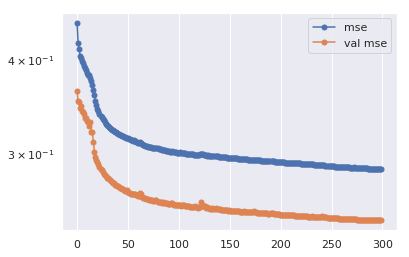

In [7]:
hidden_neurons=30

time_dim=20
seq_dim=1

model = Sequential()
model.add(SimpleRNN(input_shape=(time_dim,seq_dim), units=hidden_neurons, return_sequences=True))
model.add(TimeDistributed(Dense(1,activation='relu')))
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mse'])
model.summary()

history=model.fit(train_x,train_y,epochs=300,batch_size=32,validation_split=0.2)

plt.yscale('log')
plt.plot(history.history['mean_squared_error'] ,ms=5,marker='o',label='mse')
plt.plot(history.history['val_mean_squared_error'] ,ms=5,marker='o',label='val mse')
plt.legend()
plt.show()

### 4. 建立新模型：將一個SimpleRNN層改成兩個，訓練並畫出訓練結果。

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 20, 100)           10200     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 20, 100)           20100     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 1)             101       
Total params: 30,401
Trainable params: 30,401
Non-trainable params: 0
_________________________________________________________________
Train on 160 samples, validate on 40 samples
Epoch 1/300
160/160 [==============================] - 1s 8ms/step - loss: 0.4814 - mean_squared_error: 0.4814 - val_loss: 0.2422 - val_mean_squared_error: 0.2422
Epoch 2/300
160/160 [==============================] - 0s 2ms/step - loss: 0.3242 - mean_squared_error: 0.3242 - val_loss: 0.2602 - val_mean_squared_error: 0.2602
Epoch 3/300
160/160 [==========

160/160 [==============================] - 0s 2ms/step - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch 47/300
160/160 [==============================] - 1s 3ms/step - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 48/300
160/160 [==============================] - 1s 3ms/step - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 49/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 50/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.0670 - val_mean_squared_error: 0.0670
Epoch 51/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0689 - val_mean_squared_error: 0.0689
Epoch 52/300
160/160 [=======

160/160 [==============================] - 0s 3ms/step - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 97/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 98/300
160/160 [==============================] - 1s 4ms/step - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 99/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 100/300
160/160 [==============================] - 1s 3ms/step - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 101/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 102/300
160/160 [====

Epoch 146/300
160/160 [==============================] - 1s 3ms/step - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 147/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 148/300
160/160 [==============================] - 1s 4ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 149/300
160/160 [==============================] - 1s 3ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 150/300
160/160 [==============================] - 1s 4ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 151/300
160/160 [==============================] - 1s 4ms/step - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 152/

160/160 [==============================] - 0s 2ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 196/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 197/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 198/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 199/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 200/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 201/300
160/160 [=

Epoch 245/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 246/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 247/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 248/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 249/300
160/160 [==============================] - 0s 3ms/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 250/300
160/160 [==============================] - 1s 3ms/step - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 251/

160/160 [==============================] - 0s 2ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 295/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 296/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 297/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 298/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 299/300
160/160 [==============================] - 0s 2ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 300/300
160/160 [=

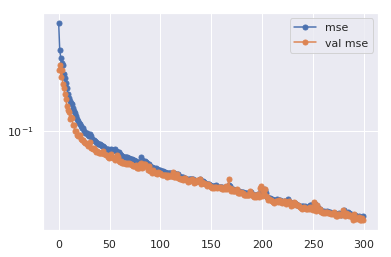

In [8]:
hidden_neurons=100

time_dim=20
seq_dim=1

model = Sequential()
model.add(SimpleRNN(input_shape=(time_dim,seq_dim), units=hidden_neurons, return_sequences=True))
model.add(SimpleRNN(units=hidden_neurons, return_sequences=True))
model.add(TimeDistributed(Dense(1,activation='tanh')))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

history=model.fit(train_x,train_y,epochs=300,batch_size=20,validation_split=0.2)

plt.yscale('log')
plt.plot(history.history['mean_squared_error'] ,ms=5,marker='o',label='mse')
plt.plot(history.history['val_mean_squared_error'] ,ms=5,marker='o',label='val mse')
plt.legend()
plt.show()

兩層RNN可得到更佳模型。

### 5. 隨機丟一個樣本進去做預測。

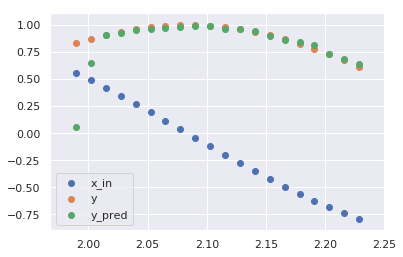

In [9]:
phi=np.pi/3.
line=np.linspace(0,2.*np.pi,500)
in_x=np.cos(2.*np.pi*line+phi)
in_y=np.sin(2.*np.pi*line+phi)

n=20
m=n

test_x=np.zeros(n,dtype=np.float32 )
test_y=np.zeros(m,dtype=np.float32 )
rand_num=np.random.choice(500-n)

test_x=in_x[rand_num:rand_num+n]
test_y=in_y[rand_num:rand_num+m]

test_x=test_x.reshape(1,test_x.shape[0],1)

# tests_x=tests_x.reshape(test_samples,20,1)
y_pred=model.predict( test_x )
y_pred=y_pred.reshape(-1)
plt.scatter(x=line[rand_num:rand_num+n],y=in_x[rand_num:rand_num+n],label="x_in")
plt.scatter(x=line[rand_num:rand_num+n],y=in_y[rand_num:rand_num+n],label="y")
plt.scatter(x=line[rand_num:rand_num+m],y=y_pred,label="y_pred")
plt.legend()
plt.show()

只有一個點的時候，不太可能做出好的預測。但有兩三個點的時候，機器慢慢就知道這是什麼樣趨勢的曲線，然後須預測出什麼樣的曲線。